In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('../resources/owm09172017_09172018.csv')

/home/eric/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10,11,20,23,25,39,40,44,45,59,63,64,67,68,84,86) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Overview of the dataset

In [3]:
df.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,REPORTTPYE,HOURLYSKYCONDITIONS,HOURLYVISIBILITY,HOURLYPRSENTWEATHERTYPE,...,MonthlyMaxSeaLevelPressureTime,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureDate,MonthlyMinSeaLevelPressureTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDeptFromNormalHeatingDD,MonthlyDeptFromNormalCoolingDD,MonthlyTotalSeasonToDateHeatingDD,MonthlyTotalSeasonToDateCoolingDD
0,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,-73.96925,2017-09-16 00:51,FM-15,CLR:00,7.00,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
1,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,-73.96925,2017-09-16 01:51,FM-15,CLR:00,6.00,BR:1 ||,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
2,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,-73.96925,2017-09-16 02:51,FM-15,CLR:00,4.00,BR:1 ||,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
3,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,-73.96925,2017-09-16 03:51,FM-15,CLR:00,3.00,BR:1 ||,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
4,WBAN:94728,NY CITY CENTRAL PARK NY US,42.7,40.77898,-73.96925,2017-09-16 03:59,FM-16,CLR:00,2.50,BR:1 ||,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(11959, 90)

In [5]:
df.columns

Index(['STATION', 'STATION_NAME', 'ELEVATION', 'LATITUDE', 'LONGITUDE', 'DATE',
       'REPORTTPYE', 'HOURLYSKYCONDITIONS', 'HOURLYVISIBILITY',
       'HOURLYPRSENTWEATHERTYPE', 'HOURLYDRYBULBTEMPF', 'HOURLYDRYBULBTEMPC',
       'HOURLYWETBULBTEMPF', 'HOURLYWETBULBTEMPC', 'HOURLYDewPointTempF',
       'HOURLYDewPointTempC', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYWindDirection', 'HOURLYWindGustSpeed', 'HOURLYStationPressure',
       'HOURLYPressureTendency', 'HOURLYPressureChange',
       'HOURLYSeaLevelPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting',
       'DAILYMaximumDryBulbTemp', 'DAILYMinimumDryBulbTemp',
       'DAILYAverageDryBulbTemp', 'DAILYDeptFromNormalAverageTemp',
       'DAILYAverageRelativeHumidity', 'DAILYAverageDewPointTemp',
       'DAILYAverageWetBulbTemp', 'DAILYHeatingDegreeDays',
       'DAILYCoolingDegreeDays', 'DAILYSunrise', 'DAILYSunset', 'DAILYWeather',
       'DAILYPrecip', 'DAILYSnowfall', 'DAILYSnowDepth',
       'DAILYAverageStatio

All data is, by design, from the Central Park station  
**Ideas**  
Cloud cover sunlight/present weather  
Could I do something neat with wind direction and speed? Some kind of cartesian coordinates with vectors for wind?  
Could choose daily data if hourly is too cluttered. Choose daily or monthly if displaying muliple years' worth of data

In [6]:
columns_keep = ['DATE', 'HOURLYSKYCONDITIONS', 'HOURLYVISIBILITY', 'HOURLYPRSENTWEATHERTYPE', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed', 'HOURLYWindDirection',
               'HOURLYWindGustSpeed', 'HOURLYPrecip', 'DAILYSunrise', 'DAILYSunset', 'DAILYWeather', 'DAILYPrecip', 'DAILYSnowfall']

In [7]:
df_thin = df[columns_keep]

In [8]:
df_thin.head()

,DATE,HOURLYSKYCONDITIONS,HOURLYVISIBILITY,HOURLYPRSENTWEATHERTYPE,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYWindGustSpeed,HOURLYPrecip,DAILYSunrise,DAILYSunset,DAILYWeather,DAILYPrecip,DAILYSnowfall
0,2017-09-16 00:51,CLR:00,7.00,NaN,87.0,0.0,000,NaN,NaN,537,1804,NaN,NaN,NaN
1,2017-09-16 01:51,CLR:00,6.00,BR:1 ||,90.0,0.0,000,NaN,0.00,537,1804,NaN,NaN,NaN
2,2017-09-16 02:51,CLR:00,4.00,BR:1 ||,90.0,3.0,040,NaN,0.00,537,1804,NaN,NaN,NaN
3,2017-09-16 03:51,CLR:00,3.00,BR:1 ||,93.0,3.0,050,NaN,0.00,537,1804,NaN,NaN,NaN
4,2017-09-16 03:59,CLR:00,2.50,BR:1 ||,93.0,0.0,000,NaN,NaN,537,1804,NaN,NaN,NaN


Missing data

In [9]:
df_thin.isna().sum()

DATE                           0
HOURLYSKYCONDITIONS          393
HOURLYVISIBILITY             364
HOURLYPRSENTWEATHERTYPE     8792
HOURLYRelativeHumidity       362
HOURLYWindSpeed             1147
HOURLYWindDirection         1149
HOURLYWindGustSpeed        10162
HOURLYPrecip                1973
DAILYSunrise                   0
DAILYSunset                    0
DAILYWeather               11762
DAILYPrecip                11447
DAILYSnowfall              11595
dtype: int64

Available Data

In [10]:
df_thin.shape[0] - df_thin.isna().sum()

DATE                       11959
HOURLYSKYCONDITIONS        11566
HOURLYVISIBILITY           11595
HOURLYPRSENTWEATHERTYPE     3167
HOURLYRelativeHumidity     11597
HOURLYWindSpeed            10812
HOURLYWindDirection        10810
HOURLYWindGustSpeed         1797
HOURLYPrecip                9986
DAILYSunrise               11959
DAILYSunset                11959
DAILYWeather                 197
DAILYPrecip                  512
DAILYSnowfall                364
dtype: int64

Drop daily values for now

In [11]:
df_skinny = df_thin.drop(['DAILYWeather', 'DAILYPrecip', 'DAILYSnowfall'], axis=1)

In [12]:
df_skinny.shape[0] - df_skinny.isna().sum()

DATE                       11959
HOURLYSKYCONDITIONS        11566
HOURLYVISIBILITY           11595
HOURLYPRSENTWEATHERTYPE     3167
HOURLYRelativeHumidity     11597
HOURLYWindSpeed            10812
HOURLYWindDirection        10810
HOURLYWindGustSpeed         1797
HOURLYPrecip                9986
DAILYSunrise               11959
DAILYSunset                11959
dtype: int64

Create features for DATE parts

In [13]:
df_skinny['DATE'].head()

0    2017-09-16 00:51
1    2017-09-16 01:51
2    2017-09-16 02:51
3    2017-09-16 03:51
4    2017-09-16 03:59
Name: DATE, dtype: object

In [14]:
def get_year(row): # Get the year from DATE column
    return int(row[:4])
df_skinny['Year'] = df_skinny['DATE'].apply(get_year)

In [15]:
def get_month(row): # Get the month from DATE column
    return int(row[5:7])
df_skinny['Month'] = df_skinny['DATE'].apply(get_month)

In [16]:
def get_day(row): # Get the day from DATE column
    return int(row[8:10])
df_skinny['Day'] = df_skinny['DATE'].apply(get_day)

In [17]:
def get_hour(row): # Get the hour from DATE column
    return int(row[11:13])
df_skinny['Hour'] = df_skinny['DATE'].apply(get_hour)

Create matching features for sunrise and sunset

In [18]:
df_skinny['SunriseHour'] = df_skinny['DAILYSunrise'] // 100

In [19]:
df_skinny['SunriseMin'] = df_skinny['DAILYSunrise'] % 100

In [20]:
df_skinny['SunsetHour'] = df_skinny['DAILYSunset'] // 100

In [21]:
df_skinny['SunsetMin'] = df_skinny['DAILYSunset'] % 100

In [22]:
df_skinny['HOURLYSKYCONDITIONS'].head()

0    CLR:00
1    CLR:00
2    CLR:00
3    CLR:00
4    CLR:00
Name: HOURLYSKYCONDITIONS, dtype: object

In [23]:
def get_weather_type(row): #Get the weather type from HOURLYSKYCONDITIONS column
    if type(row) == str:
        search = re.findall(r'([A-Z]*)', row)
        return search[0]
    else:
        return 'NaN'

In [24]:
df_skinny['HourlySkyWeather'] = df_skinny['HOURLYSKYCONDITIONS'].apply(get_weather_type)

In [25]:
df_skinny['HourlySkyWeather'].head()

0    CLR
1    CLR
2    CLR
3    CLR
4    CLR
Name: HourlySkyWeather, dtype: object

In [26]:
set(df_skinny['HourlySkyWeather'])

{'BKN', 'CLR', 'FEW', 'NaN', 'OVC', 'SCT', 'VV'}

'10' which was supposed to denote partly cloudy, does that entry exist in the original feature? No

In [27]:
df_skinny['HOURLYSKYCONDITIONS'][df_skinny['HOURLYSKYCONDITIONS'].str.startswith('10', na=False)]

Series([], Name: HOURLYSKYCONDITIONS, dtype: object)

Could try to extract all weather types from HOURLYSKYCONDITIONS, but hold off until after looking at HOURLYPRSENTWEATHERTYPE

In [28]:
df_skinny['HOURLYVISIBILITY'].describe()

count     11595
unique       25
top       10.00
freq       7305
Name: HOURLYVISIBILITY, dtype: object

In [29]:
set(df_skinny['HOURLYVISIBILITY'])

{'0.00',
 '0.25',
 '0.50',
 '0.75',
 '0.75V',
 '1.00',
 '1.00V',
 '1.25',
 '1.25V',
 '1.50',
 '1.50V',
 '1.75',
 '1.75V',
 '10.00',
 '2.00',
 '2.00V',
 '2.50',
 '2.50V',
 '3.00',
 '4.00',
 '5.00',
 '6.00',
 '7.00',
 '8.00',
 '9.00',
 nan}

Remove the trailing V because the documentation does not provide a justification for it

In [30]:
def get_visibility(row): # Create tidy hourly visibility feature
    if type(row) == str:
        search = re.search(r'[0-9\.]*', row)
        return float(search[0])
    else:
        return 'NaN'

In [31]:
df_skinny['HourlyVisibility'] = df_skinny['HOURLYVISIBILITY'].apply(get_visibility)

In [32]:
set(df_skinny['HourlyVisibility'])

{0.0,
 0.25,
 0.5,
 0.75,
 1.0,
 1.25,
 1.5,
 1.75,
 10.0,
 2.0,
 2.5,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 'NaN'}

In [33]:
df_skinny['HOURLYPRSENTWEATHERTYPE'].describe()

count        3167
unique         37
top       BR:1 ||
freq         1035
Name: HOURLYPRSENTWEATHERTYPE, dtype: object

HOURLYPRSENTWEATHERTYPE is formatted as AU|AW|MW where AU and AW are automatic weather type measurements and MW is a manual measurement

In [34]:
set(df_skinny['HOURLYPRSENTWEATHERTYPE'])

{'+RA:02 BR:1 |RA:63 |',
 '+RA:02 BR:1 |RA:63 |RA:63',
 '+RA:02 FG:2 |FG:30 RA:63 |',
 '+RA:02 FG:2 |FG:30 RA:63 |RA:63',
 '+RA:02 |RA:63 |',
 '+RA:02 |RA:63 |RA:63',
 '+SN:03 FG:2 |FG:30 SN:73 |',
 '+SN:03 FZ:8 FG:2 |FG:35 SN:73 |',
 '-FZ:8 RA:02 BR:1 |FZRA:64 |',
 '-RA:02 BR:1 |RA:61 |',
 '-RA:02 BR:1 |RA:61 |RA:61',
 '-RA:02 FG:2 |FG:30 RA:61 |RA:61',
 '-RA:02 |RA:61 |',
 '-RA:02 |RA:61 |RA:61',
 '-RA:02 ||',
 '-SN:03 BR:1 |SN:71 |',
 '-SN:03 FZ:8 FG:2 |FG:35 SN:71 |',
 '-SN:03 |SN:71 |',
 'BR:1 ||',
 'FG:2 |FG:30 |',
 'FZ:8 RA:02 BR:1 |FZRA:65 |',
 'HZ:7 |FU:05 |HZ:05',
 'HZ:7 ||HZ:05',
 'RA:02 BR:1 |RA:62 |',
 'RA:02 BR:1 |RA:62 |RA:65',
 'RA:02 FG:2 |FG:30 RA:62 |RA:65',
 'RA:02 |RA:62 s |RA:65 s',
 'RA:02 |RA:62 |',
 'RA:02 |RA:62 |RA:65',
 'SN:03 FG:2 |FG:30 SN:72 |',
 'SN:03 FZ:8 FG:2 |FG:35 SN:72 |',
 'SN:03 |SN:72 s |',
 'UP:09 BR:1 ||',
 'UP:09 ||',
 nan,
 '|RA:61 |',
 '|RA:61 |RA:61',
 '|SN:71 |'}

Test regex

In [35]:
string = 'SN:03 FZ:8 FG:2 |FG:35 SN:72 |'
re.split(r'\|', string)

['SN:03 FZ:8 FG:2 ', 'FG:35 SN:72 ', '']

In [36]:
def get_AU_weather(row): # Get the AU weather measurement
    if type(row) == str:
        search = re.split(r'\|', row)
        return search[0]
    else:
        return 'NaN'
def get_AW_weather(row): # Get the AW weather measurement
    if type(row) == str:
        search = re.split(r'\|', row)
        return search[1]
    else:
        return 'NaN'
def get_MW_weather(row): # Get the AU weather measurement
    if type(row) == str:
        search = re.split(r'\|', row)
        return search[2]
    else:
        return 'NaN'

In [37]:
df_skinny['AUWeather'] = df_skinny['HOURLYPRSENTWEATHERTYPE'].apply(get_AU_weather)
df_skinny['AWWeather'] = df_skinny['HOURLYPRSENTWEATHERTYPE'].apply(get_AW_weather)
df_skinny['MWWeather'] = df_skinny['HOURLYPRSENTWEATHERTYPE'].apply(get_MW_weather)

In [38]:
set(df_skinny['AUWeather'])

{'',
 '+RA:02 ',
 '+RA:02 BR:1 ',
 '+RA:02 FG:2 ',
 '+SN:03 FG:2 ',
 '+SN:03 FZ:8 FG:2 ',
 '-FZ:8 RA:02 BR:1 ',
 '-RA:02 ',
 '-RA:02 BR:1 ',
 '-RA:02 FG:2 ',
 '-SN:03 ',
 '-SN:03 BR:1 ',
 '-SN:03 FZ:8 FG:2 ',
 'BR:1 ',
 'FG:2 ',
 'FZ:8 RA:02 BR:1 ',
 'HZ:7 ',
 'NaN',
 'RA:02 ',
 'RA:02 BR:1 ',
 'RA:02 FG:2 ',
 'SN:03 ',
 'SN:03 FG:2 ',
 'SN:03 FZ:8 FG:2 ',
 'UP:09 ',
 'UP:09 BR:1 '}

Refine these weather type features if they are to be used

In [39]:
df_skinny['HOURLYRelativeHumidity'].describe()

count    11597.000000
mean        70.075278
std         20.481264
min         12.000000
25%         53.000000
50%         72.000000
75%         90.000000
max        100.000000
Name: HOURLYRelativeHumidity, dtype: float64

Text(0.5,1,'Hourly Relative Humidity')

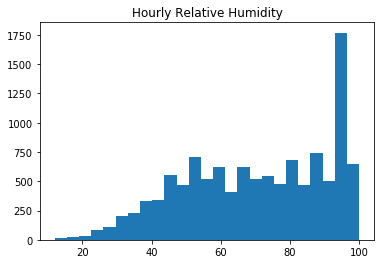

In [40]:
fig = plt.figure()
axs = fig.add_subplot(111)
axs.hist(df_skinny['HOURLYRelativeHumidity'][df_skinny['HOURLYRelativeHumidity'].isna() == False], bins=25)
axs.set_title('Hourly Relative Humidity')

In [41]:
df_skinny['HOURLYWindSpeed'].describe()

count    10812.000000
mean         4.800499
std          3.687856
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         21.000000
Name: HOURLYWindSpeed, dtype: float64

Text(0.5,1,'Hourly Wind Speed')

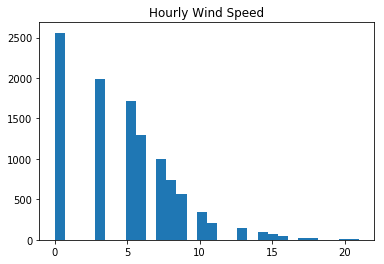

In [42]:
fig = plt.figure()
axs = fig.add_subplot(111)
axs.hist(df_skinny['HOURLYWindSpeed'][df_skinny['HOURLYWindSpeed'].isna() == False], bins=30)
axs.set_title('Hourly Wind Speed')

Indication of rounding for wind speed at low values, eg. at 0, 3, 5 are used in place of 1, 2 and 4

Wind direction is given in degrees from true north, with 360 as North and 000 as calm conditions  
No explanation in the documentation for VRB, so treat it as a missing value

In [43]:
df_skinny['HOURLYWindDirection'].describe()

count     10810
unique       38
top         VRB
freq       4622
Name: HOURLYWindDirection, dtype: object

In [44]:
set(df_skinny['HOURLYWindDirection'])

{'000',
 '010',
 '020',
 '030',
 '040',
 '050',
 '060',
 '070',
 '080',
 '090',
 '100',
 '110',
 '120',
 '130',
 '140',
 '150',
 '160',
 '170',
 '180',
 '190',
 '200',
 '210',
 '220',
 '230',
 '240',
 '250',
 '260',
 '270',
 '280',
 '290',
 '300',
 '310',
 '320',
 '330',
 '340',
 '350',
 '360',
 'VRB',
 nan}

Make a numeric feature for Wind Direction

In [45]:
def get_numeric_wind(row): # Create a numeric Wind Direction feature and remove VRB encoding
    if str(row).isnumeric() == True:
        return int(row)
    else:
        return False

In [46]:
df_skinny['HourlyWindDirection'] = df_skinny['HOURLYWindDirection'].apply(get_numeric_wind)

In [47]:
set(df_skinny['HourlyWindDirection'])

{0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360}

In [48]:
df_skinny['DATE'].groupby(by = df_skinny['HourlyWindDirection']).count()

HourlyWindDirection
0      8331
10       59
20       57
30       96
40      141
50      250
60      336
70      238
80       97
90       43
100      35
110      30
120      26
130      27
140      28
150      55
160      98
170      90
180      60
190      24
200       9
210      11
220      10
230      24
240      95
250     152
260     186
270     168
280     286
290     317
300     287
310     158
320      30
330      11
340      30
350      33
360      31
Name: DATE, dtype: int64

In [49]:
df_skinny['DATE'].groupby(by = df_skinny['HourlyWindDirection']).count() / df_skinny['DATE'][df_skinny['HourlyWindDirection'].isna() == False].count()

HourlyWindDirection
0      0.696630
10     0.004934
20     0.004766
30     0.008027
40     0.011790
50     0.020905
60     0.028096
70     0.019901
80     0.008111
90     0.003596
100    0.002927
110    0.002509
120    0.002174
130    0.002258
140    0.002341
150    0.004599
160    0.008195
170    0.007526
180    0.005017
190    0.002007
200    0.000753
210    0.000920
220    0.000836
230    0.002007
240    0.007944
250    0.012710
260    0.015553
270    0.014048
280    0.023915
290    0.026507
300    0.023999
310    0.013212
320    0.002509
330    0.000920
340    0.002509
350    0.002759
360    0.002592
Name: DATE, dtype: float64

In [50]:
df_wind = df_skinny['DATE'][df_skinny['HourlyWindDirection'] != 0].groupby(by = df_skinny['HourlyWindDirection']).count() / df_skinny['DATE'][df_skinny['HourlyWindDirection'].isna() == False][df_skinny['HourlyWindDirection'] != 0].count()

In [51]:
df_wind.sort_values(ascending = False)[:10]

HourlyWindDirection
60     0.092613
290    0.087376
300    0.079107
280    0.078831
50     0.068908
70     0.065601
260    0.051268
270    0.046307
310    0.043550
250    0.041896
Name: DATE, dtype: float64

The most frequent nonzero wind direction values belong to east and west directions, ie 50-70 for west and 260-300 for east

In [52]:
df_skinny['HOURLYWindSpeed'].describe()

count    10812.000000
mean         4.800499
std          3.687856
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         21.000000
Name: HOURLYWindSpeed, dtype: float64

Text(0.5,1,'Hourly Wind Speed')

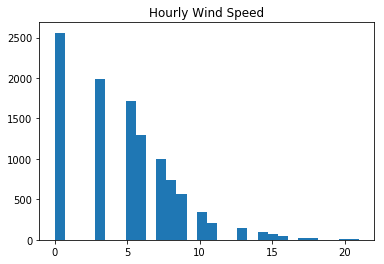

In [53]:
fig = plt.figure()
axs = fig.add_subplot(111)
axs.hist(df_skinny['HOURLYWindSpeed'][df_skinny['HOURLYWindSpeed'].isna() == False], bins = 30)
axs.set_title('Hourly Wind Speed')

Again, there is evidence of rounding at low integer values, ie at 0, 3, 5 instead of 1, 2 and 4

In [54]:
df_skinny['HOURLYWindGustSpeed'].describe()

count    1797.000000
mean       21.293823
std         4.252267
min        16.000000
25%        18.000000
50%        21.000000
75%        23.000000
max        44.000000
Name: HOURLYWindGustSpeed, dtype: float64

Text(0.5,1,'Hourly Wind Gust Speed')

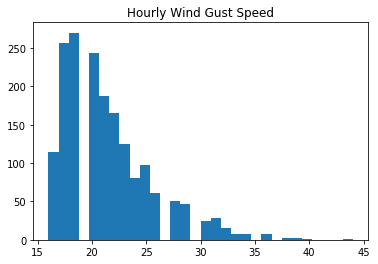

In [55]:
fig = plt.figure()
axs = fig.add_subplot(111)
axs.hist(df_skinny['HOURLYWindGustSpeed'][df_skinny['HOURLYWindGustSpeed'].isna() == False], bins = 30)
axs.set_title('Hourly Wind Gust Speed')

There was probably rounding at wind gust speeds approaching 20 mph

Make feature for minutesof sunlight

In [56]:
df_skinny[['SunriseHour', 'SunriseMin', 'SunsetHour', 'SunsetMin']].head()

,SunriseHour,SunriseMin,SunsetHour,SunsetMin
0,5,37,18,4
1,5,37,18,4
2,5,37,18,4
3,5,37,18,4
4,5,37,18,4


In [57]:
df_skinny['SunlightMin'] = (df_skinny['SunsetHour'] - df_skinny['SunriseHour']) * 60 + df_skinny['SunsetMin'] - df_skinny['SunriseMin']

In [58]:
df_skinny[['SunriseHour', 'SunriseMin', 'SunsetHour', 'SunsetMin', 'SunlightMin']].iloc[100]
# Spot checking the results

SunriseHour      5
SunriseMin      39
SunsetHour      18
SunsetMin        0
SunlightMin    741
Name: 100, dtype: int64

Remove troublesome values the features to be used in visualization:  
Year, Month, Day, Hour, SunlightMin, HourlySkyWeather, HourlyVisibility, HourlyWindDirection, HOURLYWindSpeed

In [59]:
keep = ['Year', 'Month', 'Day', 'Hour', 'SunlightMin', 'HourlySkyWeather', 'HourlyVisibility', 'HourlyWindDirection', 'HOURLYWindSpeed']

In [60]:
df_skinny[keep].count()

Year                   11959
Month                  11959
Day                    11959
Hour                   11959
SunlightMin            11959
HourlySkyWeather       11959
HourlyVisibility       11959
HourlyWindDirection    11959
HOURLYWindSpeed        10812
dtype: int64

Trear HOURLYWindSpeed for missing values

In [61]:
df_skinny['HOURLYWindSpeed'].head()

0    0.0
1    0.0
2    3.0
3    3.0
4    0.0
Name: HOURLYWindSpeed, dtype: float64

In [62]:
def get_wind_speed(row): # Create hourly wind speed feature
    if pd.isna(row) == False:
        return row
    else:
        return 'NaN'

In [63]:
df_skinny['HourlyWindSpeed'] = df_skinny['HOURLYWindSpeed'].apply(get_wind_speed)

In [64]:
df_skinny['HourlyWindSpeed'].count()

11959

In [65]:
keep = ['Year', 'Month', 'Day', 'Hour', 'SunlightMin', 'HourlySkyWeather', 'HourlyVisibility', 'HourlyWindDirection', 'HourlyWindSpeed']

In [66]:
df_keep = df_skinny[keep]

In [67]:
df_keep.count()

Year                   11959
Month                  11959
Day                    11959
Hour                   11959
SunlightMin            11959
HourlySkyWeather       11959
HourlyVisibility       11959
HourlyWindDirection    11959
HourlyWindSpeed        11959
dtype: int64

In [68]:
df_keep.columns

Index(['Year', 'Month', 'Day', 'Hour', 'SunlightMin', 'HourlySkyWeather',
       'HourlyVisibility', 'HourlyWindDirection', 'HourlyWindSpeed'],
      dtype='object')

In [79]:
df_keep.iloc[0]

Year                   2017
Month                     9
Day                      16
Hour                      0
SunlightMin             747
HourlySkyWeather        CLR
HourlyVisibility          7
HourlyWindDirection       0
HourlyWindSpeed           0
Name: 0, dtype: object

In [80]:
df_keep.iloc[-1]

Year                    2018
Month                      9
Day                       15
Hour                      23
SunlightMin              747
HourlySkyWeather         CLR
HourlyVisibility         NaN
HourlyWindDirection    False
HourlyWindSpeed          NaN
Name: 11958, dtype: object

In [82]:
df_keep['Year'].groupby(by = df_keep['Hour']).count()

Hour
0     485
1     507
2     491
3     496
4     507
5     537
6     533
7     506
8     489
9     496
10    465
11    492
12    474
13    460
14    455
15    462
16    463
17    475
18    453
19    446
20    466
21    474
22    470
23    857
Name: Year, dtype: int64

Something weird might be going on with the time features...

In [85]:
df_keep[df_keep['Hour'] == 23].head()

,Year,Month,Day,Hour,SunlightMin,HourlySkyWeather,HourlyVisibility,HourlyWindDirection,HourlyWindSpeed
37,2017,9,16,23,744,SCT,5,0,0
38,2017,9,16,23,744,FEW,5,0,0
39,2017,9,16,23,744,NaN,NaN,False,NaN
87,2017,9,17,23,741,OVC,7,0,0
88,2017,9,17,23,741,BKN,7,60,3


In [86]:
df_keep[df_keep['Hour'] == 22].head()

,Year,Month,Day,Hour,SunlightMin,HourlySkyWeather,HourlyVisibility,HourlyWindDirection,HourlyWindSpeed
35,2017,9,16,22,744,BKN,6,290,3
36,2017,9,16,22,744,OVC,6,290,3
86,2017,9,17,22,741,OVC,6,0,0
124,2017,9,18,22,739,OVC,10,False,8
157,2017,9,19,22,736,OVC,10,False,9


There are duplicate rows!

In [90]:
df_keep['HourlySkyWeather'].groupby(by = [df_keep['Year'], df_keep['Month'], df_keep['Day'], df_keep['Hour']]).count()

Year  Month  Day  Hour
2017  9      16   0       1
                  1       1
                  2       1
                  3       2
                  4       3
                  5       2
                  6       2
                  7       3
                  8       2
                  9       1
                  10      4
                  11      2
                  12      2
                  13      1
                  14      1
                  15      1
                  16      1
                  17      1
                  18      1
                  19      1
                  20      1
                  21      1
                  22      2
                  23      3
             17   0       1
                  1       2
                  2       4
                  3       4
                  4       3
                  5       4
                         ..
2018  9      14   16      1
                  17      1
                  18      1
                  19     

In [92]:
df_dedup = df_keep.drop_duplicates(subset = ['Year', 'Month', 'Day', 'Hour'], keep = 'first')

In [93]:
df_dedup['HourlySkyWeather'].groupby(by = [df_keep['Year'], df_keep['Month'], df_keep['Day'], df_keep['Hour']]).count()

Year  Month  Day  Hour
2017  9      16   0       1
                  1       1
                  2       1
                  3       1
                  4       1
                  5       1
                  6       1
                  7       1
                  8       1
                  9       1
                  10      1
                  11      1
                  12      1
                  13      1
                  14      1
                  15      1
                  16      1
                  17      1
                  18      1
                  19      1
                  20      1
                  21      1
                  22      1
                  23      1
             17   0       1
                  1       1
                  2       1
                  3       1
                  4       1
                  5       1
                         ..
2018  9      14   16      1
                  17      1
                  18      1
                  19     

In [95]:
df_dedup.shape[0] / 24

364.9166666666667

Might be missing some data but I'll try using df_dedup

In [96]:
df_dedup.to_csv('../resources/weatherData.csv')